<a href="https://colab.research.google.com/github/nurfnick/Calculus_1/blob/main/Project_Part1_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun With Functions

Dr. Jacob's work trying to do something similar to the assignment 1.

## Domains and Inverses

I am going to start with the function

$$ 
f(x) = \frac {x-2}{x-3}
$$

It is an interesting function that I can explore!

In [20]:
def f(x):
  return (x-2)/(x-3)

f(0)

0.6666666666666666

In [21]:
f(1)

0.5

First I'll note that the domain of the function is all real numbers **except** $3$.  This could be written in interval notation as $(-\infty,3)\cup (3,\infty)$

Let's see what happens if we graph it including that number.  


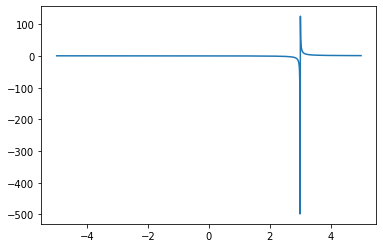

In [22]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))

I don't expect you to just come up with all this code on your own **but** I expect you to make an attempt to see what it does!

```
import matplotlib.pyplot as plt 
import numpy as np

```

These two lines import important packages that we will use.  matplotlib is a plotting package and numpy allows us to deal with lots of numbers quickly.  Both are given the standard shortcuts (colab actually suggests these shortcuts!)

Next part sets up the domain to be plotted over.

```
x = np.linspace(-5,5,1000)
```

I asked for 1000 points between -5 and 5.  I called this `x`.  If I call `x` again, I'll get the same array of numbers.  

Lastly I plot the function using the `x` and the `f(x)`.

In [23]:
x[0:7] #here are the first seven entries of x

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994])

I am not happy with my plot, I cannot really understand what is happening at 3.  

In [24]:
f(3)

ZeroDivisionError: ignored

It breaks python to put it in there so I should do something else...

In [25]:
f(3.00000000000001)

97904339725446.56

That is a big number!

In [26]:
f(2.9999999999999)

-10007999171933.436

That is a really small number!  I bet these are blowing up in different directions!

For the inverse, you swap the $x$ and $y$ and solve for $y$ again.  You'd start with 

$$ x = \frac{y-2}{y-3} $$

and end up with 

$$ y = \frac{2-3x}{1-x}$$

This is my inverse!  Let's see if we can check it.

In [27]:
def finverse(x):
  return (2-3*x)/(1-x)

finverse(0)

2.0

I like to test a function after I define it, just to see it is doing what I expect.  The inverse swaps the role of $x$ and $y$ so we should see $f(2)=0$.

In [28]:
f(2)

-0.0

Not sure what a -0.0 is...  Let's graph these together.

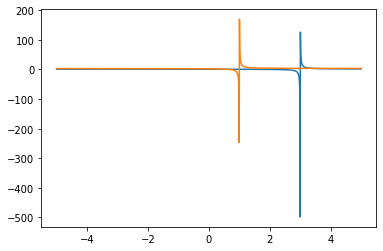

In [30]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))
plt.plot(x,finverse(x))
plt.show() #this just gets rid of the note

How should the inverse compare to the function?  A reflection across the line, y = x.  Can you see that in our picture?  Probably not...  Let me play with the window to try to see the reflection!

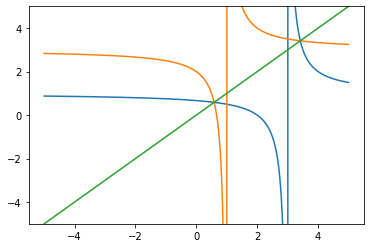

In [33]:
plt.plot(x,f(x))
plt.plot(x,finverse(x))
plt.ylim(-5,5) #sets the y limits to -5 and 5
plt.plot(x,x) #plots the line y = x
plt.show() #this just gets rid of the note

This is still not quite right.  The vertical lines on both of these are in error, that is not part of the function.  I'll need to slice the interval up to make it correct.

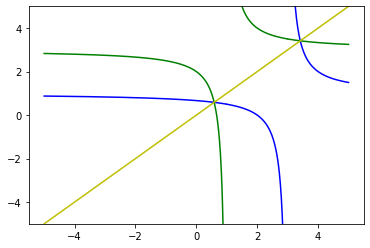

In [47]:
x1 = np.arange(-5,1,.01) #similar to linspace but you give it the interval size not the number of items in the list.
x2 = np.arange(1.01,3,.01)
x3 = np.arange(3.01,5,.01)

x = np.append(x1,x2)
x = np.append(x,x3)

plt.plot(x1,f(x1),x2,f(x2),x3,f(x3), color = 'b')
plt.plot(x1,finverse(x1),x2,finverse(x2),x3,finverse(x3), color = 'g')
plt.plot(x,x, color = 'y')

plt.ylim(-5,5)
plt.show()

That is much clearer of a vizualisation of the reflection!

Let's check it by ccomposing the functions.

In [ ]:
f(finverse(x))

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

What!?  Remeber we defined `x` above?  It just passed all those values into the composition.  Is this what we expected?  Yes, it should return the same value you give it, 
$$
f(f^{-1}(x)) = f^{-1}(f(x)) = x
$$

In python we can ask if somthing is equal (or equivalent) with double equals.

In [ ]:
f(finverse(x)) == x

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

So what gives, why are not all equal?  Rounding errors!  Let's simplify what we pass.

In [ ]:
x = np.round(x,3) #rounding to three decimals

y = np.round(f(finverse(x)),3)

x == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

That looks like all trues!

In [ ]:
all(x == y)

True

The above checked that they are all true.  Be wary of rounding, you are throwing away info.  I only did it here to make things work!

## Sympy

To do much of the calculus in this course, we will need to use the sympy package.

In [3]:
from sympy import *

Then I can define $f(x)$ in a simialar way I did above but first I must declare that $x$ is a symbol. 

In [5]:
x = symbols('x')

f = (x-2)/(x-3)


In [6]:
f

(x - 2)/(x - 3)

`simplify` attempts to simplify the expression.

In [7]:
f.simplify()

(x - 2)/(x - 3)

`expand` would do any multiplications

In [8]:
f.expand()

x/(x - 3) - 2/(x - 3)

`factor` would factor a polynomial

In [9]:
f.factor()

(x - 2)/(x - 3)

`subs` plugs in a value for the variable.

In [10]:
f.subs(x,1)

1/2

Of course I could compose the function with itself too!

In [12]:
f.subs(x,f)

(-2 + (x - 2)/(x - 3))/(-3 + (x - 2)/(x - 3))

And I might need to simplify!

In [13]:
f.subs(x,f).simplify()

(x - 4)/(2*x - 7)

Might be useful to mention there are lots of built-in functions!

In [14]:
g = sin(x)

In [15]:
g.subs(x,0)

0

In [16]:
h = sqrt(x**2-1)

In [17]:
h.expand()

sqrt(x**2 - 1)

In [19]:
e = exp(-x**2)

e

exp(-x**2)

## Doing a Bunch of Values

For loops are really powerful (and fairly easy) in python.  You can interate over any list of items!

In [57]:
mylist = [1,0.1,0.001,0.0001]

for i in mylist:
  print(i)


1
0.1
0.001
0.0001


Of course that is boring!  We actually want to do something with those values!

In [52]:
newlist = [] #give myself an empty list! 
for i in mylist:
  x = i + 1
  newlist.append(x) #adds the value x to the newlist

print(newlist)

[3, 2, 1.1, 1.001]


You might want to define a function that computes the slope.  This is not the best but you could make it work for you...

In [ ]:
def slope(function,pointofinterest,stepsize):
  top = function(pointofinterest+stepsize) - function(pointofinterest)
  bottom = stepsize
  return top/bottom

I always try my function...

In [49]:
slope(f,1,.2)

-0.2777777777777776

Now I'll do it for all the values in `mylist`

In [58]:
answers = []
for i in mylist:
  answer = slope(f,1,i)
  answers.append(answer)

answers

[-0.5, -0.26315789473684237, -0.2501250625312479, -0.25001250062495206]

These seem like they are approaching a value!  More on that to come!

2